# Team Frisch Project 3

### Background

After doing research, we understand that Malawi suffers from extreme hunger, malnutrition, poverty, high disease rates, and is more susceptable to natural disasters. All of these are also exacerbated by present and future climate change. As a result, we are interested in understanding the the food demand for households in Malawi in order to investigate any profound results relative to their diets.

We will first begin by installing all necessary packages to complete our deliverables.

In [1]:
!pip install CFEDemands
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install dvc
!pip install gnupg

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached dvc-2.10.1-py3-none-any.whl (400 kB)
  Using cached shortuuid-1.0.8-py3-none-any.whl (9.5 kB)
  Using cached rich-12.2.0-py3-none-any.whl (229 kB)
  Using cached zc.lockfile-2.0-py2.py3-none-any.whl (9.7 kB)
Processing /home/jovyan/.cache/pip/wheels/4b/35/53/dfa4d3a4196794cb0a777a97c68dcf02b073d33de9c135d72a/configobj-5.0.6-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/ee/1f/7c/610bdb7d5541b98d9743c5953e32681ef35dd54fadddd347e8/nanotime-0.5.2-py3-none-any.whl
  Using cached dpath-2.0.6-py3-none-any.whl (15 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached flatten_dict-0.4.2-py2.py3-none-any.whl (9.7 kB)
  Using cached grandalf-0.6-py3-none-any.whl (31 kB)
  Using cached flufl.lock-7

## Deliverbale [A] Choice of population with supporting expenditure data

As previously mentioned, we have chosen households in Malawi as our population of interest. To get expenditure data, we are importing sheets from Malawi Integrated Household Survey (IHS) for the years 2004 and 2010.

We begin this process by first defining our input file. Then we run the eep153_tools.sheets function provided in class to read the sheet.

In [2]:
InputFiles = {'Expenditures':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','Expenditures'),
              'malawi_consumption':('1c2rXKtnVawQ802xAh4qm5HDK9MiFTFlGZJjcgTooRVo','malawi_consumption'),
              'HH Characteristics':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','HH Characteristics'),
              'FCT':('1Uy4h4cB3_O6Ls3Pvk920ScTA1jaKdVb4TAkZ51n-8DA','05 NV_sum_57 (per 100g EP)')}

In [3]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    dfs = read_sheets(key)

    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0]
        
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

We can now extract the information for expenditures by reading in the input files- expenditures. We also set any 0 inputs to NaN for future ease in consolidating the information and creating visualizations. The expenditures is expressed in local currency; in this case that would be the Malawian kwacha.

In [4]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Apple,Avocado,Banana,"Bean, brown","Bean, white",Beef,Biscuits,Bottled water,Bottled/ canned beer,Bread,...,Tomato,Tomato sauce (bottle),Traditional beer (masase),Wheat flour,White sweet potato,"Wild fruit (masau, mlambe, etc.)",Wine or commercial liquor,"Yeast, baking powder, bicarbonate of soda",Yoghurt,nan
j,t,m,,,,,,,,,,,,,,,,,,,,,
10101002025,2004,1,NaN,10.0,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
10101002051,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10101002072,2004,1,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
10101002079,2004,1,NaN,16.0,60.0,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
10101002095,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,260.0,...,150.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
315556140365,2010,1,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
315556140388,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN


Now that we have the information for expenditures in the given years, we will follow the same process to extract information from our input filez relative to households in Malawi. This data is very detailed and gives us household characteristics including the composition of households by age and sex.

In [5]:
# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
10101002025,2004,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0
10101002051,2004,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10101002072,2004,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0
10101002079,2004,1,0,1,0,0,0,1,0,2,1,0,0,0,1,0
10101002095,2004,1,0,0,2,0,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
315556140365,2010,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
315556140388,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


## Deliverable [A] Estimate Demand System

Now that we have expenditure and household characterstics, we can import consumption from the same data source and estimate the demand system.

This entails a similar process as before- getting the consumption from the input files.

In [6]:
q = get_clean_sheet(InputFiles['malawi_consumption'][0],
                    sheet=InputFiles['malawi_consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                              Apple  Avocado  Banana  Bean, brown  \
j           t    m u                                                 
10101002025 2004 1 Gram          NaN      NaN     NaN          NaN   
                   Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      2.0     NaN          NaN   
10101002051 2004 1 Gram          NaN      NaN     NaN          NaN   
...                              ...      ...     ...          ...   
31202086364 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   
31202086374 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   

i                              Bean, white  Beef  Biscuits  Bottled water  \
j           t    m u                                                        
10101002025 2004 1 Gram                NaN   NaN       NaN            NaN   
                   Kg                  NaN   2.0       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
10101002051 2004 1 Gram                NaN   NaN       NaN            NaN   
...                                    ...   ...       ...            ...   
31202086364 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
31202086374 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   

i                              Bottled/ canned beer  Bread  ...  Tomato  \
j           t    m u                                        ...           
10101002025 2004 1 Gram                         NaN    NaN  ...     NaN   
                   Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     5.0   
10101002051 2004 1 Gram                         NaN    NaN  ...     NaN   
...                                             ...    ...  ...     ...   
31202086364 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...    15.0   
31202086374 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     7.0   

i                              Tomato sauce (bottle)  \
j           t    m u                                   
10101002025 2004 1 Gram                          NaN   
                   Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
10101002051 2004 1 Gram                          NaN   
...                                              ...   
31202086364 2004 1 Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
31202086374 2004 1 Kg                            NaN   
                   Piece                         NaN   

i                              Traditional beer (masase)  Wheat flour  \
j           t    m u                                                    
10101002025 2004 1 Gram                              NaN          NaN   
                   Kg                                NaN          NaN   
                   Millilitre                        NaN          NaN   
                 

Now that we have our consumption, we use the lecture code for the first step of estimation which is the "reduced form" linear regression. Before we are able to get our estimation of demand, we have to complete two steps:

the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

In [11]:
import sys
import cfe

y = np.log(x)
y
result = cfe.Result(y=y,z=z)

In [12]:
result.get_reduced_form()

Now we can see the estimated coefficient $\delta$ which reflects demand broken down by household characteristic.

In [13]:
result.delta.to_dataframe().unstack('k')

delta                      \
k                                             M 0-3     M 4-8    M 9-13   
i                                                                         
Avocado                                   -0.027469  0.036233 -0.003036   
Banana                                    -0.094776 -0.079738  0.054585   
Bean, brown                                0.033756  0.058986  0.062206   
Bean, white                                0.088998  0.050373  0.097664   
Beef                                      -0.098905  0.033595  0.060964   
Biscuits                                  -0.224607 -0.173919  0.092814   
Bread                                     -0.065294 -0.004541  0.059943   
Buns, scones                               0.045246  0.120182  0.113218   
Cabbage                                    0.014356  0.015227  0.079775   
Cassava tubers                             0.027358  0.048204  0.101075   
Chicken                                   -0.109181  0.007102  0.016048   
Chinese cabbage                            0.103933 -0.009215  0.075137   
Chips (vendor)                            -0.054027 -0.069796  0.035470   
Citrus, naartje, orange, etc.              0.005910 -0.110700  0.039455   
Cooking oil                               -0.099341 -0.079330  0.009946   
Dried fish                                -0.008991  0.006457  0.023662   
Eggs                                      -0.056172 -0.002189  0.055644   
Freezes (flavoured ice)                    0.126634  0.058527 -0.054907   
Fresh fish                                -0.121088 -0.049693 -0.031192   
Fresh milk                                -0.073576 -0.040439  0.057022   
Goat                                      -0.007920 -0.012172  0.109584   
Green maize                               -0.058496  0.010045  0.122148   
Groundnut                                 -0.028979 -0.001292  0.052138   
Groundnut flour                           -0.048324 -0.047073 -0.018861   
Irish potato                              -0.091835 -0.061779  0.038687   
Maize - boiled or roasted                 -0.041780  0.024351  0.097697   
Maize ufa mgaiwa (normal flour)            0.064310  0.112515  0.041167   
Maize ufa refined (fine flour)             0.018110  0.063524  0.142145   
Mandazi, doughnut (vendor)                 0.046214  0.009386  0.062543   
Meat (vendor)                             -0.004185  0.053168 -0.023871   
Meat eaten at restaurant                  -0.280654 -0.132582  0.000111   
Nkwani                                     0.031160  0.033066  0.047762   
Okra / Therere                             0.014872 -0.055624  0.051188   
Onion                                     -0.091255 -0.071492  0.024967   
Orange sweet potato                        0.161137  0.019499  0.062452   
Pork                                      -0.011009 -0.006449  0.131056   
Powdered milk                             -0.256034 -0.050838 -0.001133   
Rice                                      -0.039716 -0.001724  0.017940   
Salt                                       0.003369  0.010418  0.082138   
Samosa (vendor)                           -0.247947  0.056758 -0.128120   
Soft drinks (coca cola, fanta)            -0.100256 -0.027790 -0.008544   
Sugar                                      0.064521  0.044586  0.073426   
Sugar cane                                 0.081139  0.010243  0.090556   
Sweets, candy, chocolates                 -0.290199 -0.086628 -0.118559   
Tanaposi rape                              0.042259  0.039258  0.050717   
Tea                                       -0.084797 -0.006682  0.072521   
Tomato                                    -0.100691 -0.075390  0.004835   
White sweet potato                         0.046810  0.057825  0.181314   
Yeast, baking powder, bicarbonate of soda -0.110725 -0.072785  0.022043   

                                                                         \
k                                           M 14-18   M 19-30   M 31-5

We also estimate the good-time constants $a_{it}$ (this captures the effects of prices) by indexing 'i' which gives us the same estimation by time. In our case this is the years 2004 and 2010.

In [14]:
result.a.to_dataframe().unstack('i')

a                                                        \
i        Avocado    Banana Bean, brown Bean, white      Beef  Biscuits   
t    m                                                                   
2004 1  2.732589  2.553386    3.563498    3.480738  4.906085  2.736930   
2010 1  3.709544  3.873656    4.573519    4.511708  5.846323  3.824394   

                                                        ...                  \
i          Bread Buns, scones   Cabbage Cassava tubers  ... Samosa (vendor)   
t    m                                                  ...                   
2004 1  4.330692     3.272087  2.821576       2.735024  ...        2.692764   
2010 1  5.089198     4.234627  3.772250       3.782887  ...        3.680945   

                                                            \
i      Soft drinks (coca cola, fanta)     Sugar Sugar cane   
t    m                                                       
2004 1                       4.026075  3.647259   2.475238   
2010 1                       4.758748  4.549718   3.376966   

                                                                    \
i      Sweets, candy, chocolates Tanaposi rape       Tea    Tomato   
t    m                                                               
2004 1                  1.879936      2.486638  2.237929  3.439653   
2010 1                  3.224241      3.538246  2.994732  4.361938   

                                                                     
i      White sweet potato Yeast, baking powder, bicarbonate of soda  
t    m                                                               
2004 1           2.985221                                  1.016818  
2010 1           4.048783                                  2.198148  

[2 rows x 49 columns]

Now we can continue with the second step. This is pulled from lecture code, using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

We can run the one line of code to produce our estimates.

In [15]:
result.get_beta(as_df=True)

i
Avocado                                      0.383249
Banana                                       0.598940
Bean, brown                                  0.192255
Bean, white                                  0.232248
Beef                                         0.365007
Biscuits                                     0.816535
Bread                                        0.360046
Buns, scones                                 0.303703
Cabbage                                      0.259849
Cassava tubers                               0.286150
Chicken                                      0.276638
Chinese cabbage                              0.313419
Chips (vendor)                               0.352606
Citrus, naartje, orange, etc.                0.648388
Cooking oil                                  0.591433
Dried fish                                   0.369809
Eggs                                         0.357952
Freezes (flavoured ice)                      0.561462
Fresh fish                

In [ ]:
result.get_alpha(as_df = True)

i
Avocado                                      2.732589
Banana                                       2.553386
Bean, brown                                  3.563498
Bean, white                                  3.480738
Beef                                         4.906085
Biscuits                                     2.736930
Bread                                        4.330692
Buns, scones                                 3.272087
Cabbage                                      2.821576
Cassava tubers                               2.735024
Chicken                                      5.382624
Chinese cabbage                              2.325482
Chips (vendor)                               3.575587
Citrus, naartje, orange, etc.                2.329459
Cooking oil                                  3.783886
Dried fish                                   3.677535
Eggs                                         3.874567
Freezes (flavoured ice)                      1.836321
Fresh fish                

Now that we have our estimates, we can run an assessment of fit to compare our total expenditures by the model estimate with the actual total expenditures.

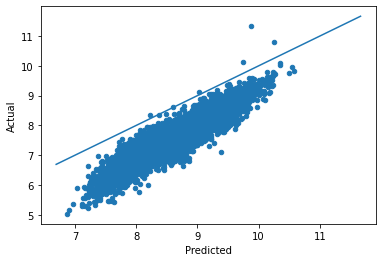

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

To save the result we run the follwing code.

In [17]:
result.to_dataset('icrisat.ds')

<xarray.Dataset>
Dimensions:           (j: 23551, i: 49, k: 14, t: 2, m: 1, kp: 14)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) object 'Avocado' ... 'Yeast, baking powder, bicarbo...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * kp                (kp) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.3832 0.5989 0.1923 ... 0.5876 0.215 0.4303
    delta             (k, i) float64 -0.02747 -0.09478 0.03376 ... 0.1424 0.2584
    prices            object None
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        (j, t, m) float64 nan nan nan nan nan ... nan nan nan nan
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.04403 0.04426 0.02459 ... 0.04379 0.03
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0

## Deliverable [B] Nutritional Content of Different Foods

For this deliverable, we will use a new dataset that has Malawian foods and their corresponding nutrient characterstics. We begin by installing any necessary packages and reading the nutrition table data given to us in class.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = data = pd.read_csv('./Nutrient_Table.csv')
data = data.iloc[1: , :]
data

,Code,Food Group,Reference,Food Item Name,Mois,Energy,Energy.1,N,Prot,Fat,...,Niac,Vit B6,Folate,Vit B12,Panto,Biot,Vit C,Vit D,Vit E,Phytate
1,MW01_0001,Staples,R06,"African cake, (Chikondamoyo/Chigumu cha nthoch...",49,215,911,0.91,5.7,3,...,0.8,0.292,15,0.1,NaN,NaN,4,NaN,0.72,NaN
2,MW01_0002,Staples,R07,"Banana fritters, (Zitumbuwa)",54.8,189,800,0.51,3.2,2.5,...,0.8,0.356,12,NaN,NaN,NaN,7,0,1.1,NaN
3,MW01_0003,Staples,R44,"Bread, wheat, brown, homemade (Buledi wa bulaw...",11.2,362,1531,1.72,10. 7,6.2,...,1.9,0.181,56,0,0.1,1.1,NaN,NaN,0.55,NaN
4,MW01_0004,Staples,2,"Bread, wheat, white, commercial,(Buledi woyera)",35.6,256,1086,1.36,8.5,1.5,...,1.2,0.071,30,0,0.31,NaN,NaN,NaN,NaN,NaN
5,MW01_0005,Staples,8,"Bread, wheat, white, homemade,(Buledi woyera)",37.2,270,1141,1.65,10.4,4.6,...,1.5,0.059,29,0,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,MW04_0020,Vegetable,10,Tanaposi rape,89.7,37,158,0.24,1.5,0.3,...,0.6,0.263,194,0,NaN,NaN,60,NaN,2.86,NaN
61,MW10_0011,NaN,NaN,Tea,100,33,138,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,MW04_0036,Vegetables,NaN,Tomato,94.5,26,109,0.14,0.9,0.2,...,0.6,0.08,15,0,0.02,0,14,0,0.54,NaN
63,MW01_0066,Staples,NaN,White sweet potato,76,97,411,0.21,1.3,0.1,...,0.7,0.092,8,0,0.51,6.1,9,0,0.29,NaN


Next, we want to understand the nutritional significance of the foods consumed by our population. We will do so by taking note of the fiber intake by given the data in the nutrition table. 

We will first take note of the necessary recommended daily fiber intake for females and males.

In [32]:
fiber_dri_female = 25
fiber_dri_male = 38
fiber_female_meal = 25/3
fiber_male_meal = 38/3

Now we can use the nutrition data on fiber to understand what percentage of fiber females and males receive given traditional Malawian food staples. 

In [24]:
data_copy = data.copy()
data_copy['Fiber'] = data_copy['Fiber'].astype(float)
female_fiber_percent = sum(data_copy['Fiber'] >= fiber_female_meal) / len(data_copy['Fiber'])
male_fiber_percent = sum(data_copy['Fiber'] >= fiber_male_meal) / len(data_copy['Fiber'])
print(female_fiber_percent)
print(male_fiber_percent)

0.046875
0.015625


The outcomes is 4.6% and 1.5% for females and males, respectively. 

Next, we will 

In [33]:
fat_dri_meal = list(range(20, 35))
fat_dri_meal = [i / 3 for i in fat_dri_meal]

In [30]:
data_copy['Fat'] = data_copy['Fat'].astype(float)
data_copy['Fat'] = data_copy[['Fat']].isin(fat_dri)
fat_percent = sum(data_copy['Fat']) / len(data_copy['Fat'])
print(fat_percent)

NameError: name 'fat_dri' is not defined

Text(0, 0.5, 'Fiber (g)')

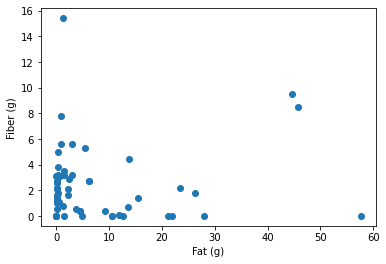

In [31]:
plt.scatter(data['Fat'].astype(float).tolist(), data['Fiber'].astype(float).tolist())
plt.xlabel("Fat (g)")
plt.ylabel("Fiber (g)")